In [352]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib.patches as patches
#from prettytable import PrettyTable

%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

# Base Model
## Base model is only with amplitude detectors, no photo detectors

In [393]:
configuration="DRFPMI" #MI,FPMI,PRFPMI,DRFPMI
if configuration == "MI":
    import c_crosscheck_ifo_models_MI as ifo
    import c_crosscheck_mifsim_gui_MI as mif
elif configuration == "FPMI":
    import c_crosscheck_ifo_models_FPMI as ifo
    import c_crosscheck_mifsim_gui_FPMI as mif

elif configuration == "PRFPMI":
    import c_crosscheck_ifo_models_PRFPMI as ifo
    import c_crosscheck_mifsim_gui_PRFPMI as mif

elif configuration == "DRFPMI":
    import c_crosscheck_ifo_models_DRFPMI as ifo
    import c_crosscheck_mifsim_gui_DRFPMI as mif

base_m = mif.model_base()
base_i = ifo.model_base()

# Sweep

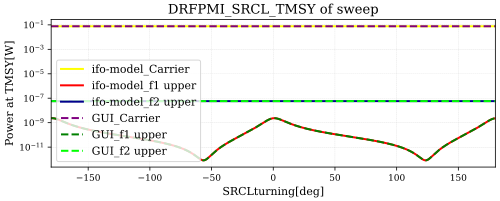

In [282]:
#cross check
# sweep
DOF=('SRCL') #DARM,CARM,MICH,PRCL,SRCL
NODE=('TMSY') #REFL,AS,POP,POS,TMSX,TMSY
model, out_i = ifo.run_sweep(DOF, base_i)
model, out_m = mif.run_sweep(DOF, base_m)

#ifo-model
CR=('CR_'+NODE)
SB1p=('SB1p_'+NODE)
SB1m=('SB1m_'+NODE)
SB2p=('SB2p_'+NODE)
SB2m=('SB2m_'+NODE)


#gui
car_ad=('car_ad_'+NODE)
fsb1_upper=('fsb1_upper_ad_'+NODE)
fsb2_upper=('fsb2_upper_ad_'+NODE)
fsb1_lower=('fsb1_lower_ad_'+NODE)
fsb2_lower=('fsb2_lower_ad_'+NODE)


fig = plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
#figure of GUI and ifo-model
plt.semilogy(out_i.x, out_i[CR]**2,label="ifo-model_Carrier",color="yellow",linewidth="2") # CR => 0
plt.semilogy(out_i.x, out_i[SB1p]**2,label="ifo-model_f1 upper",color="red",linewidth="2")
plt.semilogy(out_i.x, out_i[SB2p]**2,label="ifo-model_f2 upper",color="darkblue",linewidth="2")
#mifsim_gui
plt.semilogy(out_m.x, out_m[car_ad]**2,label="GUI_Carrier",LineStyle='--',color="purple",linewidth="2") # CR => 0
plt.semilogy(out_m.x, out_m[fsb1_upper]**2,label="GUI_f1 upper",LineStyle='--',color="green",linewidth="2")
plt.semilogy(out_m.x, out_m[fsb2_upper]**2,label="GUI_f2 upper",LineStyle='--',color="lime",linewidth="2")
plt.title(configuration+'_'+DOF+"_"+NODE+' of sweep')
ylabel=("Power at "+NODE+"[W]")
xlabel=(DOF+'turning[deg]')                      
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend(loc=3)

plt.show

plt.savefig("./fig/power_"+configuration+"_"+DOF+"_"+NODE+".png")



# Demodulated signal

In [1]:

#dumodulated signal
#DRFPMI
DOF=('DARM') #DARM,CARM,MICH,PRCL,SRCL 
NODE=('TMSY') #REFL,AS,POP,POS,TMSX,TMSY

model,out_i = ifo.run_sweep(DOF,base_i)
model,out_m = mif.run_sweep(DOF,base_m)

#ifo-models
I1=('pd1_'+NODE+'I1')
I2=('pd1_'+NODE+'I2')
Q1=('pd1_'+NODE+'Q1')
Q2=('pd1_'+NODE+'Q2')


#gui
GUI_I1=('pd1_fsb1_0_'+NODE)
GUI_Q1=('pd1_fsb1_90_'+NODE)
GUI_I2=('pd1_fsb2_0_'+NODE)
GUI_Q2=('pd1_fsb2_90_'+NODE)

fig = plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.plot(out_i.x, (out_i[I1]),label="ifo-model_"+NODE+"I1",c='yellow',linewidth="2")
plt.plot(out_i.x, (out_i[I2]),label="ifo-model_"+NODE+"I2",c='orange',linewidth="2")
plt.plot(out_i.x, (out_i[Q1]),label="ifo-model_"+NODE+"Q1",c='blue',linewidth="2")
plt.plot(out_i.x, (out_i[Q2]),label="ifo-model_"+NODE+"Q2",c='darkblue',linewidth="2")
plt.plot(out_m.x, (out_m[GUI_I1]),label="GUI_"+NODE+"I1",c='purple',Linestyle='--',linewidth="2")
plt.plot(out_m.x, (out_m[GUI_I2]),label="GUI_"+NODE+"I2",c='green',Linestyle='--',linewidth="2")
plt.plot(out_m.x, (out_m[GUI_Q1]),label="GUI_"+NODE+"Q1",c='red',Linestyle='--',linewidth="2")
plt.plot(out_m.x, (out_m[GUI_Q2]),label="GUI_"+NODE+"Q2",c='lime',Linestyle='--',linewidth="2")
plt.xlim(0.001,100)
plt.title(configuration+"_"+DOF+"_"+NODE+' of demodulated signal')
plt.ylabel('power[W]')
plt.legend()

plt.show
plt.savefig("./fig/demodulated signal_"+configuration+"_"+DOF+"_"+NODE+".png")
#plt.savefig(configuration+"_"+DOF+"_"+NODE+"_dumodulates signal.pdf")



NameError: name 'ifo' is not defined

# Transfer function

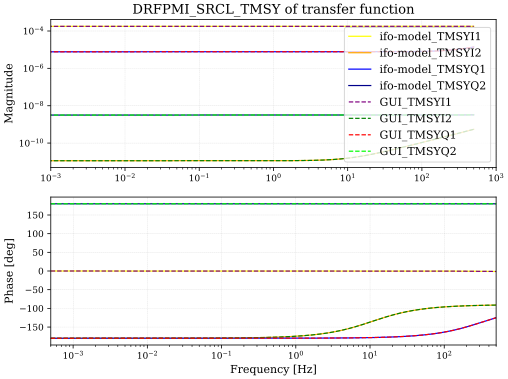

In [342]:

#transfer function
DOF=('SRCL') #DARM,CARM,MICH,PRCL,SRCL 
NODE=('TMSY') #REFL,AS,POP,POS,TMSX,TMSY

model_i,out_i = ifo.run_fsig(DOF,base_i)
model_m,out_m = mif.run_fsig(DOF,base_m)

#ifo-models
I1=('pd2_'+NODE+'I1')
I2=('pd2_'+NODE+'I2')
Q1=('pd2_'+NODE+'Q1')
Q2=('pd2_'+NODE+'Q2')


#gui
GUI_I1=('pd2_fsb1_0_'+NODE)
GUI_Q1=('pd2_fsb1_90_'+NODE)
GUI_I2=('pd2_fsb2_0_'+NODE)
GUI_Q2=('pd2_fsb2_90_'+NODE)

fig = plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.loglog(out_i.x, np.abs(out_i[I1]),label="ifo-model_"+NODE+"I1",c='yellow')
plt.loglog(out_i.x, np.abs(out_i[I2]),label="ifo-model_"+NODE+"I2",c='orange')
plt.loglog(out_i.x, np.abs(out_i[Q1]),label="ifo-model_"+NODE+"Q1",c='blue')
plt.loglog(out_i.x, np.abs(out_i[Q2]),label="ifo-model_"+NODE+"Q2",c='darkblue')
plt.loglog(out_m.x, np.abs(out_m[GUI_I1]),label="GUI_"+NODE+"I1",c='purple',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_I2]),label="GUI_"+NODE+"I2",c='green',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_Q1]),label="GUI_"+NODE+"Q1",c='red',Linestyle='--')
plt.loglog(out_m.x, np.abs(out_m[GUI_Q2]),label="GUI_"+NODE+"Q2",c='lime',Linestyle='--')

plt.xlim(0.001,1000)
plt.title(configuration+"_"+DOF+"_"+NODE+' of transfer function')
plt.ylabel('Magnitude')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_i.x, np.angle(out_i[I1])*180/np.pi,label="ifo-model_"+NODE+"I1",c='yellow')
plt.semilogx(out_i.x, np.angle(out_i[I2])*180/np.pi,label="ifo-model_"+NODE+"I2",c='orange')
plt.semilogx(out_i.x, np.angle(out_i[Q1])*180/np.pi,label="ifo-model_"+NODE+"Q1",c='blue')
plt.semilogx(out_i.x, np.angle(out_i[Q2])*180/np.pi,label="ifo-model_"+NODE+"Q2",c='darkblue')
plt.semilogx(out_m.x, np.angle(out_m[GUI_I1])*180/np.pi,label="GUI_"+NODE+"I1",c='purple',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_I2])*180/np.pi,label="GUI_"+NODE+"I2",c='green',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_Q1])*180/np.pi,label="GUI_"+NODE+"Q1",c='red',Linestyle='--')
plt.semilogx(out_m.x, np.angle(out_m[GUI_Q2])*180/np.pi,label="GUI_"+NODE+"Q2",c='lime',Linestyle='--')

plt.ylabel('Phase [deg]')
plt.xlabel('Frequency [Hz]')

plt.show
plt.savefig("./fig/transfer function_"+configuration+"_"+DOF+"_"+NODE+".png")
#plt.savefig(configuration+"_"+DOF+"_"+NODE+"_transfer function.pdf")

